In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [3]:
df_mat = pd.read_csv('student-mat.csv', sep = ';');
df_mat.head();

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df_por = pd.read_csv('student-por.csv', sep = ';');
df_por.head();

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
df = pd.merge(df_mat, df_por, how = 'inner', on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']);
df;

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,traveltime_x,studytime_x,failures_x,schoolsup_x,famsup_x,paid_x,activities_x,nursery,higher_x,internet,romantic_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,guardian_y,traveltime_y,studytime_y,failures_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10


In [6]:
df.rename(columns={
    'guardian_x': 'guardian_mat',
    'traveltime_x': 'traveltime_mat',
    'studytime_x': 'studytime_mat',
    'failures_x': 'failures_mat',
    'shcoolsup_x': 'schoolsup_mat',
    'famsup_x': 'famsup_mat',
    'paid_x': 'paid_mat',
    'activities_x': 'activities_mat',
    'higher_x': 'higher_mat',
    'romantic_x': 'romantic_mat',
    'famrel_x': 'famrel_mat',
    'freetime_x': 'freetime_mat',
    'gooyt_x': 'goout_mat',
    'Dalc_x': 'Dalc_mat',
    'Walc_x': 'Walc_mat',
    'health_x': 'health_mat',
    'absences_x': 'absences_mat',
    'G1_x': 'G1_mat',
    'G2_x': 'G2_mat',
    'G3_x': 'G3_mat',
    'guardian_y': 'guardian_por',
    'traveltime_y': 'traveltime_por',
    'studytime_y': 'studytime_por',
    'failures_y': 'failures_por',
    'shcoolsup_y': 'schoolsup_por',
    'famsup_y': 'famsup_por',
    'paid_y': 'paid_por',
    'activities_y': 'activities_por',
    'higher_y': 'higher_por',
    'romantic_y': 'romantic_por',
    'famrel_y': 'famrel_por',
    'freetime_y': 'freetime_por',
    'gooyt_y': 'goout_por',
    'Dalc_y': 'Dalc_por',
    'Walc_y': 'Walc_por',
    'health_y': 'health_por',
    'absences_y': 'absences_por',
    'G1_y': 'G1_por',
    'G2_y': 'G2_por',
    'G3_y': 'G3_por'
}, inplace = True);
df.head();

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_x,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_x,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_y,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_y,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13


## Definição da média final

In [7]:
df['GF'] = (df['G1_mat'] + df['G2_mat'] + df['G3_mat'] + df['G1_por'] + df['G2_por'] + df['G3_por'])/6;
df;

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_x,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_x,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_y,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_y,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11,6.500000
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11,7.833333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12,10.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.333333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16,11.666667
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7,5.500000
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9,7.166667
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10,12.666667


In [8]:
df.describe();

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_x,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_y,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707,11.471204
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438,2.818131
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000,9.500000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000,11.333333
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.333333


## Boxplot das médias dos alunos

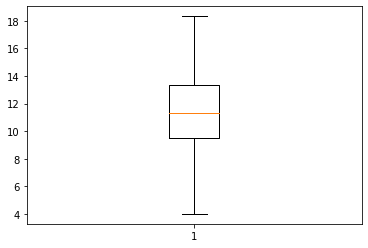

In [11]:
plt.boxplot(df['GF']);

O boxplot mostra que não valores muito discrepantes entre as médisa dos alunos, não há outliers. Pelo gráfico também podemos inferir que a mediana das médias é algumas casas decimais acima de 11, que o primeiro quartil fica em torno de 9.6, que o terceiro quartil algumas casas abaixo de 14, que a menor média é 4 e que a maior é algo em torno de 18.2. Podemos conferir cada um desses dados usando as devidas funções

### Média das médias dos alunos

In [27]:
media_medias = np.median(df['GF']);
print(media_medias);

11.333333333333334


### Primeiro quartil das médias

In [28]:
primeiro_quartil = df['GF'].quantile(0.25);
print(primeiro_quartil);

9.5


### Terceiro quartil das médias

In [29]:
terceiro_quartil = df['GF'].quantile(0.75);
print(terceiro_quartil);

13.333333333333334


### Menor média

In [30]:
menor_media = np.min(df['GF']);
print(menor_media);

4.0


### Maior média

In [31]:
maior_media = np.max(df['GF']);
print(maior_media);

18.333333333333332
